In [22]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib
%matplotlib inline

In [5]:
# 加载数据

mnist = input_data.read_data_sets("./.MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./.MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./.MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./.MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./.MNIST_data/t10k-labels-idx1-ubyte.gz


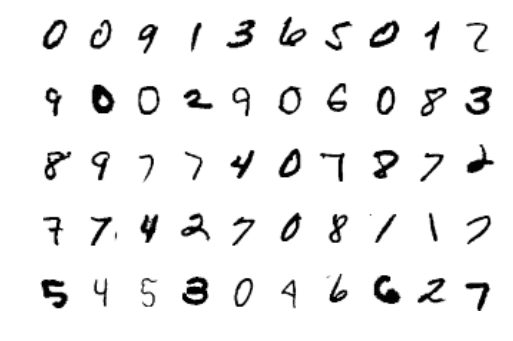

In [23]:
# 显示部分训练数据

fig = plt.figure()
for i in range(50):
    tmp = mnist.train.images[i]
    tmp = tmp.reshape((28,28))
    plt.subplot(5, 10, i+1)
    plt.axis('off')
    plt.imshow(tmp, cmap = cm.Greys)
plt.show()

In [7]:
# 定义模型
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1

n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# 输入
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [9]:
# 初始化参数
init = tf.global_variables_initializer()

# Session
sess = tf.Session()
sess.run(init)

# 训练
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                      y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(avg_cost))
print("Optimization Finished!")

# 测试
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}, session=sess))

Epoch: 0001 cost= 158.038378795
Epoch: 0002 cost= 42.297245529
Epoch: 0003 cost= 26.537983858
Epoch: 0004 cost= 18.299822063
Epoch: 0005 cost= 13.212857217
Epoch: 0006 cost= 9.887914820
Epoch: 0007 cost= 7.404691480
Epoch: 0008 cost= 5.480766460
Epoch: 0009 cost= 4.094839914
Epoch: 0010 cost= 3.095841366
Epoch: 0011 cost= 2.314983416
Epoch: 0012 cost= 1.727695442
Epoch: 0013 cost= 1.288745482
Epoch: 0014 cost= 1.062374695
Epoch: 0015 cost= 0.816442941
Epoch: 0016 cost= 0.621191118
Epoch: 0017 cost= 0.596032897
Epoch: 0018 cost= 0.457236403
Epoch: 0019 cost= 0.377767954
Epoch: 0020 cost= 0.451342242
Optimization Finished!
Accuracy: 0.9497


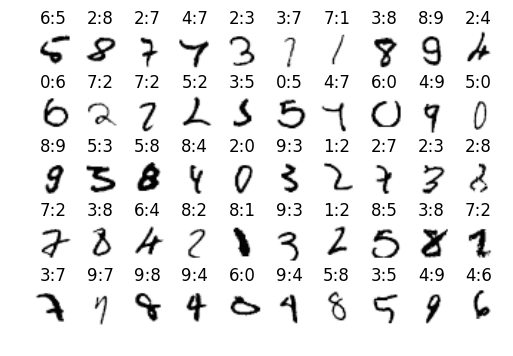

In [19]:
# 显示一些错误的预测
predictions = tf.argmax(pred.eval({x: mnist.test.images}, session=sess), 1).eval(session=sess)
facts = tf.argmax(mnist.test.labels, 1).eval(session=sess)
diffs = np.where(predictions != facts)[0]

fig = plt.figure()
for i in range(50):
    diff_index = diffs[i]
    tmp = mnist.test.images[diff_index].reshape((28,28))
    plt.subplot(5, 10, i+1)
    plt.axis('off')
    plt.title('%d:%d' %(predictions[diff_index], facts[diff_index]))
    plt.imshow(tmp, cmap = cm.Greys)
